Project Credit Risk
==

**Deadline : 28/02/2022**

***
DETAIL DU PLAN DU PROJET
==
*****

<u><h4>Définir l'énoncé du problème</h4></u> <br>
Une banque souhaite mettre en place une nouvelle grille de probabilité de défaut (PD) pour noter sa base de
clients. La Direction Risque utilise l’information sur un échantillon de clients représentatifs afin de développer
un modèle permettant de prévoir avec quelle probabilité le client tombera en défaut.
Ce modèle permettra de cibler les clients à risque élevé/faible. La Direction Risque a extrait des informations de
50 000 clients pour déceler les défauts. Est-ce que le client est tombée en défaut ? Deux réponses sont
possibles à cette question : 1 – oui ou 0 – non.

**Objectif** : Le but de cette étude est de construire un modèle basé sur cet échantillon permettant de construire la nouvelle grille de probabilité de défaut.

<u><h4>Decrir le jeu de données</h4></u>
- [X] construction de dictionnaire de données

<u><h4>Analyse de la variable cible</h4></u><br>
 contexte théorique, pertinence, choix et analyse de la variable cible


- [X] Identifier la variable cible
- [ ] études économétriques
- [X] Examen de la distribution de la variable cible

<u><h4>Exploration de base des données</h4></u>

- [X] Statistique descriptif des données
- [X] Analyse visuelle exploratoire des données pour la distribution des données (Histogramme et Barcharts)
- [X] Sélection des caractéristiques en fonction de la distribution des données
- [ ] Traitement des valeurs aberrantes
- [X] Traitement des valeurs manquantes

<u><h4>Construction de profile de risque (defaut)</h4></u>
- [X] Analyse visuelle de corrélation
- [X] Analyse statistique des corrélations (Sélection des caractéristiques)

<u><h4>Preparation modélisation</h4></u>
- [ ] Conversion des données en données numériques pour le ML
- [ ] Échantillonnage et validation croisée K-fold

<u><h4>Modelisation et construction de classe de defaut</h4></u>

- [ ] modele de probabilité lineaire
- [ ] modele de discrimination
- [ ] modele logit
- [ ] algo de classification
- [ ] algo xgbost
- [ ] algo SVM


<u><h4>Conclusion</h4></u>

[**remarque**](https://zhuanlan.zhihu.com/p/255105477) : <br>
*pour chque algo ici proposer un documentation (description assez exhaustive du fonctionnement de ces algo avec a l'appuis un schema algorithim)* 

resource :
- [x] [source data](http://www.creditriskanalytics.net/datasets-private2.html)

Chargement de bibliothèque
--

In [1]:
import pandas as pd
import os
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
import numpy as np
import scipy as sp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import skew
import scorecardpy as sc
import statsmodels.api as sm
from statsmodels.tools import tools
from statsmodels.iolib.summary import Summary
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector, ExhaustiveFeatureSelector
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, precision_recall_curve
from sklearn.metrics import make_scorer, auc, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE


#formating
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import time
import re

Chargement des données
--

In [2]:
list_df = [c for c in os.listdir() if c.endswith(".csv")]
list_df

['mortgage.csv', 'test.csv']

In [3]:
df = pd.read_csv(list_df[0])
print(df.shape)
df.head(5)

(622489, 23)


,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


Description des données
--

In [4]:
# à integrer dans la fonction "utils.py" à documenter

def description(element: str) -> str:

    dictionnaire = {
      "ID": "ID de l’emprunteur",
      "time" : "Periode d’observation",
      "orig_time" : "Periode d'observation à l’origine",
      "first_time" : "Periode de la première observation",
      "mat_time" : "Periode de l’échéance",
      "balance_time" : "Solde impayé au moment de l’observation",
      "LTV_time" : "Ratio prêt/valeur au moment de l’observation (en %)",
      "interest_rate_time" : "Taux d’intérêt au moment de l’observation (en %)",
      "hpi_time": "Indice des prix des logements au moment de l’observation (année de référence = 100)",
      "gdp_time": "Croissance du produit intérieur brut (PIB) au moment de l’observation (en %)",
      "uer_time": "Taux de chômage au moment de l’observation (en %)",
      "REtype_CO_orig_time": "Type immobilier (copropriété = 1, sinon = 0)",
      "REtype_PU_orig_time": "Type de bien immobilier (développement urbain planifié = 1, sinon = 0)",
      "REtype_SF_orig_time": "Type de Maison (unifamiliale = 1, sinon = 0)",
      "investor_orig_time": "Investisseur (emprunteur = 1, sinon = 0)",
      "balance_orig_time": "Solde impayé au moment de l’origine",
      "FICO_orig_time": "Score FICO au moment de l’origination (en %)",
      "LTV_orig_time": "Ratio prêt/valeur à l’origine (en %)",
      "Interest_Rate_orig_time": "Taux d’intérêt à l’origine (en %)",
      "hpi_orig_time": "Indice des prix des logements à de l’origine (annéede base = 100)",
      "default_time": "Observation du défaut au moment de l’observation",
      "payoff_time": "Observation du gain au moment de l’observation",
      "status_time": "Défaut (1), gain (2) et observation hors défaut/non-paiement (0) au moment de l’observation"}

    return dictionnaire[element]

In [5]:
description("REtype_CO_orig_time")

'Type immobilier (copropriété = 1, sinon = 0)'

# Data processing

**gestion des doublons**

In [6]:
df.sort_values(by = ['id', 'time'] ,ascending = [True,False],inplace=True)
df.drop_duplicates(subset="id",keep="first",inplace=True)

In [7]:
print(df.shape)
df.head(5)

(50000, 23)


,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
23,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,1,0,45000.0,715,69.4,9.200,87.03,1,0,1
25,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
30,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
65,4,60,-2,25,119,52686.35,34.898842,10.500,189.82,2.836358,...,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
68,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,1,0,52800.0,527,80.0,9.155,186.91,0,1,2


In [8]:
# à integrer dans la fonction "utils.py"

class Missing(object):

    """
    ---------
    Attributs
    ---------
    data : Jeu de données -> DataFrame  
    --------
    Méthodes
    --------
    stat() :
        Fournit les statisques sur les données manquantes.

    plot():
        Fournit un graphique permettant de visualiser graphiquement 
        les données manquantes dans la base de données
    """  

    def __init__(self,data):

        self.data = data

    def stat(self,):

        """
        Cette fournit les statisques sur les données manquantes.
        -------------
        Paramètre : 
        - data : jeu de données -> DataFrame
    
        Sortie : 
        - Statistique renseignat sur :
            * le nombre de donnée manquantes de chaque variable
            * le % de données manquantes de chaque variable
            * le type de données de chaque variable
            * le nombre de données disponible de chaque variable
        -------------
        """

        d1 = self.data.isna().sum().to_frame()
        d2 = ((self.data.isna().sum() / self.data.shape[0])*100).to_frame().round(2).astype('string')+"%"
        d3 = self.data.dtypes.to_frame()
        d4 = self.data.count()
        df_missing = pd.concat([d1,d2,d3,d4],axis = 1)
        df_missing.columns = ['missing value','% of missing value','data dtypes',"count"]
        print('='*75)
        print("Statistique données manquante",'{:>45}'.format("obs: "+str(df_missing.shape[0])))
        print('-'*75)
        print(df_missing.sort_values(by='missing value',ascending=False))
        print("="*75)


    def plot(self,):

        """
        Cette fournit un graphique permettant de visualiser graphiquement 
        les données manquantes dans la base de données
        -------------
        Paramètre : 
        - data : jeu de données -> DataFrame
    
        Sortie : 
        - graphique : heatmap()
        -------------
        """
        plt.figure(figsize = (18,9))
        sns.heatmap(self.data.isna());


In [9]:
missing = Missing(df)

In [10]:
missing.stat()

Statistique données manquante                                       obs: 23
---------------------------------------------------------------------------
                         missing value % of missing value data dtypes  count
LTV_time                            18              0.04%     float64  49982
id                                   0               0.0%       int64  50000
REtype_PU_orig_time                  0               0.0%       int64  50000
payoff_time                          0               0.0%       int64  50000
default_time                         0               0.0%       int64  50000
hpi_orig_time                        0               0.0%     float64  50000
Interest_Rate_orig_time              0               0.0%     float64  50000
LTV_orig_time                        0               0.0%     float64  50000
FICO_orig_time                       0               0.0%       int64  50000
balance_orig_time                    0               0.0%     float64  50000
i

traitemnet des données manquantes de la variable `LTV_time`
--

In [11]:
description("LTV_time")

'Ratio prêt/valeur au moment de l’observation (en %)'

In [12]:
df["LTV_time"].describe()

count    49982.000000
mean        79.311836
std         25.132516
min          0.000000
25%         64.116470
50%         78.718905
75%         95.745375
max        616.985143
Name: LTV_time, dtype: float64

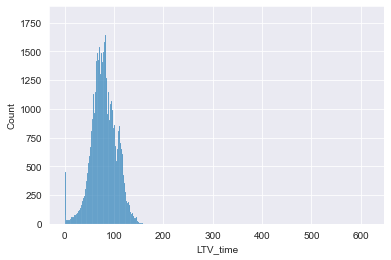

In [13]:
sns.histplot(df["LTV_time"]);

**Remarque** : la variable `LTV_time` semble ne pas dispersé on peu donc opter pour une imputation par la moyenne ou par la mediane 

In [14]:
df["LTV_time"].fillna(df["LTV_time"].mean(),inplace = True) 

Traitement de la variable `orig_time` pour lesquelle on des valeurs negative
--

In [15]:
# identification des obs pour lesquel ["orig_time"] est negatif
drop_index = list()
for c,idx in zip(df["orig_time"],df.index.tolist()):
    if c < 0:
        drop_index.append(idx)

In [16]:
df = df.drop(drop_index)
df.reset_index(drop=True)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
1,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,1,0,52800.0,527,80.0,9.155,186.91,0,1,2
2,6,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,...,1,0,212000.0,670,80.0,6.580,191.42,1,0,1
3,7,26,18,25,138,107916.38,77.919574,9.000,225.10,2.151365,...,1,0,109250.0,601,95.0,9.000,186.91,0,1,2
4,8,25,18,25,138,152393.21,58.819187,7.250,226.29,2.899137,...,1,0,192600.0,663,90.0,7.250,186.91,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48949,49996,60,17,52,138,62630.97,51.916531,3.250,189.82,2.836358,...,0,1,82000.0,688,71.9,1.625,179.45,0,0,0
48950,49997,60,17,52,137,347558.19,74.355912,2.750,189.82,2.836358,...,0,0,331417.0,692,75.0,1.250,179.45,0,0,0
48951,49998,60,17,52,137,143676.16,71.896413,3.000,189.82,2.836358,...,0,0,166250.0,750,88.0,2.250,179.45,0,0,0
48952,49999,60,17,52,177,259349.31,42.640152,2.745,189.82,2.836358,...,0,0,345000.0,779,60.0,1.750,179.45,0,0,0


Analyse de la variable cible
==

In [17]:
endog = df["default_time"]

In [18]:
proportion = (df.groupby(["default_time"]).size())
d1 = (((((df.groupby(["default_time"]).size()) / df.shape[0])*100).round(2)).to_frame("% of count")).astype("string")+"%"
resume = pd.concat([proportion.to_frame("Count"), d1],axis=1)
resume

,Count,% of count
default_time,,
0,33972,69.4%
1,14982,30.6%


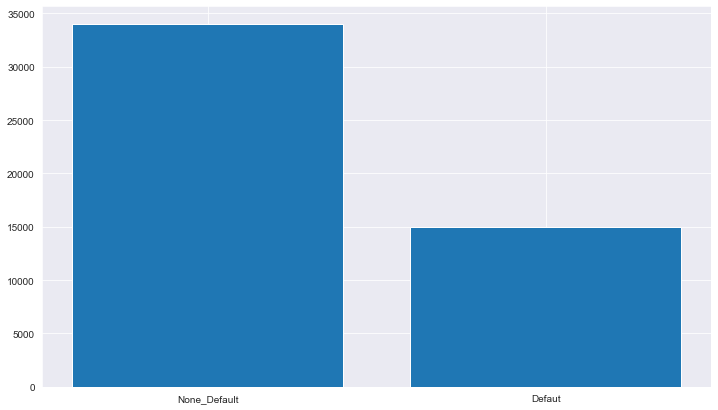

In [19]:
cible = proportion.to_frame("count")
cible = cible.reset_index()

plt.figure(figsize=(12,7))
plt.bar(cible["default_time"] ,cible["count"])
plt.xticks(ticks=list(range(2)),labels=["None_Default","Defaut"]);

<h1><u>Analyse exploratoire des données</u></h1>

### identification des variables categorielles et continues

In [20]:
categorical_variable = list(df.nunique()[df.nunique()<4].index)
continuous_var = list(df.nunique()[df.nunique()>4].index)

In [21]:
try:
    if "default_time" in categorical_variable or "id" in continuous_var:
        categorical_variable.remove("default_time")
        continuous_var.remove("id")
    else:
        pass
except Exception as e:
    pass

### statistique descriptif

In [22]:
def statistique(data,var):
    
    a = data[var].describe().T.round(3)[["count","mean","std","min","50%","max"]]
    a["cv"] = a['std'] / a['mean']
    
    return a

In [23]:
# stat varaible continue
statistique(df,continuous_var)

,count,mean,std,min,50%,max,cv
time,48954.0,36.274,13.891,1.000,32.000,60.000,0.382946
orig_time,48954.0,21.028,6.438,0.000,22.000,60.000,0.306163
first_time,48954.0,24.851,7.769,1.000,25.000,60.000,0.312623
mat_time,48954.0,138.877,16.317,18.000,141.000,229.000,0.117492
balance_time,48954.0,242563.781,203345.760,0.000,187129.360,8688100.840,0.838319
LTV_time,48954.0,80.354,24.217,0.000,79.312,616.985,0.301379
interest_rate_time,48954.0,6.964,2.183,0.000,6.990,37.500,0.313469
hpi_time,48954.0,190.441,26.053,107.830,189.820,226.290,0.136804
gdp_time,48954.0,1.683,1.923,-4.147,2.274,5.132,1.142602
uer_time,48954.0,6.007,1.678,3.800,5.500,10.000,0.279341


In [24]:
#stat variable qualitative
statistique(df,categorical_variable)

,count,mean,std,min,50%,max,cv
REtype_CO_orig_time,48954.0,0.066,0.248,0.0,0.0,1.0,3.757576
REtype_PU_orig_time,48954.0,0.117,0.322,0.0,0.0,1.0,2.752137
REtype_SF_orig_time,48954.0,0.621,0.485,0.0,1.0,1.0,0.780998
investor_orig_time,48954.0,0.120,0.325,0.0,0.0,1.0,2.708333
payoff_time,48954.0,0.530,0.499,0.0,1.0,1.0,0.941509
status_time,48954.0,1.367,0.748,0.0,2.0,2.0,0.547184


### construction de profile de risque et statistique croiser avec la varuable cible ``default_time``

In [25]:
class RiskProfil(object):
    
    def __init__(self,data):

        self.data = data

    def categorical_profile(self,target,categorical):
    
        z_categorical = (self.data.groupby(target)[categorical].mean().T).round(3)
        z_categorical.columns = ["Default","None default"]
        z_categorical = z_categorical[:]

        return z_categorical

    def continuous_profile(self,target,continous):
    
        z_continous = (self.data.groupby(target)[continous].mean().T).round(3)
        z_continous.columns = ["Default","None default"]
        z_continous = z_continous[:]
    
        return z_continous


In [26]:
risk = RiskProfil(df)

In [27]:
#qualitative variables
risk.categorical_profile("default_time", categorical_variable) #moyenne de chaque varaible pour chaque classe de defaut

,Default,None default
REtype_CO_orig_time,0.065,0.068
REtype_PU_orig_time,0.115,0.123
REtype_SF_orig_time,0.622,0.620
investor_orig_time,0.115,0.130
payoff_time,0.764,0.000
status_time,1.529,1.000


In [28]:
#continuous varaiables
risk.continuous_profile("default_time", continuous_var) #moyenne de chaque varaible pour chaque classe de defaut

,Default,None default
time,36.488,35.788
orig_time,20.044,23.259
first_time,24.241,26.235
mat_time,136.921,143.314
balance_time,237274.488,254557.364
LTV_time,72.729,97.645
interest_rate_time,6.718,7.524
hpi_time,196.569,176.545
gdp_time,2.188,0.539
uer_time,5.629,6.867


### Construction hypothèse (facultatif) 

- H1 : une augmentation du taux d'interet entrain t'il une hausse du taux de defaut

In [29]:
u = df.groupby('default_time')['Interest_Rate_orig_time',"interest_rate_time"].mean()
u["diff"] = u["interest_rate_time"] - u["Interest_Rate_orig_time"]
u # au vu des resultat il semblerait que oui

,Interest_Rate_orig_time,interest_rate_time,diff
default_time,,,
0,5.168062,6.717648,1.549586
1,5.849049,7.523815,1.674766


Analyse visuelle des variables categorielle
--

In [30]:
def BarCharts(Data, categorical_columns):
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(30,6))
    fig.suptitle('Bar charts of: '+ str(categorical_columns))

    for colName, plotNumber in zip(categorical_columns, range(len(categorical_columns))):
        Data.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

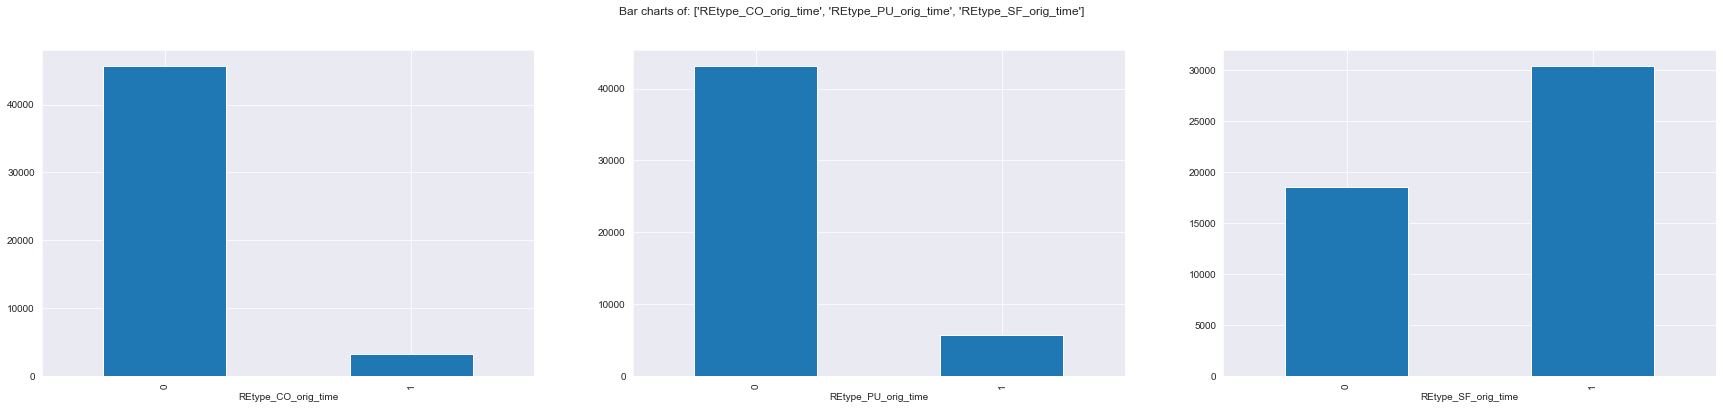

In [31]:
BarCharts(df,categorical_variable[:3])

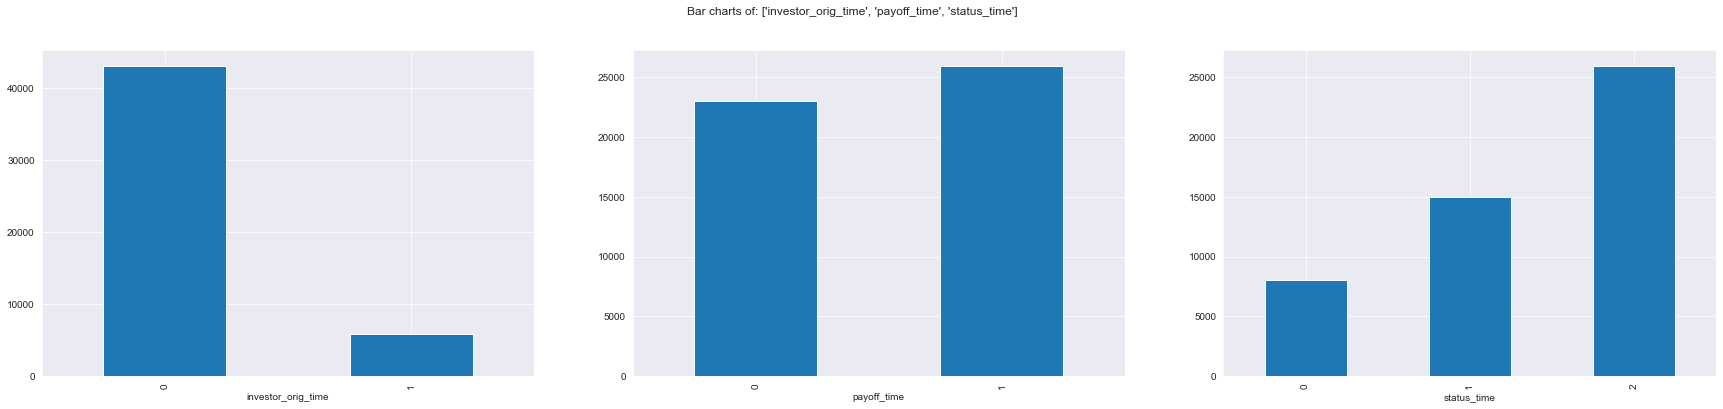

In [32]:
BarCharts(df,categorical_variable[3:])

Analyse visuelle des variables continues
--

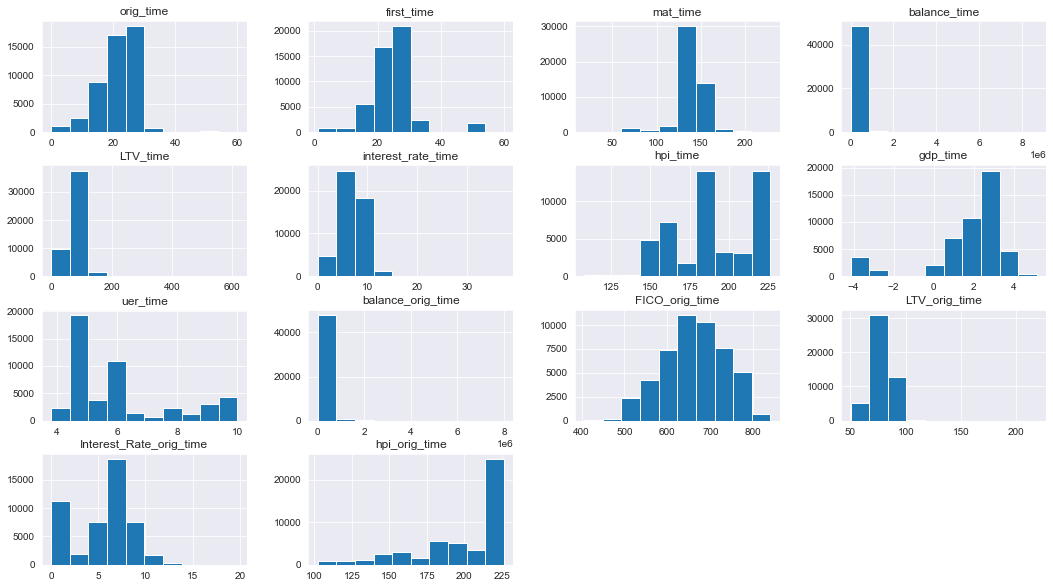

In [33]:
df.hist(continuous_var[1:], figsize=(18,10));

selection de variable 
==

enquête préliminaire sur la relation entre les caractéristiques
--


In [34]:
# à integrer dans la fonction "utils.py"

def Get_correlate_variable(corr_matrix, corr_threshold):
    """
        Cette fonction fournit un table avec les varaibles correlé significativement.
        -------------
        Paramètre : 
        - corr_matrix : matrice de correlation -> DataFrame
        - corr_threshold : seuil de significativité de correlation -> float
    
        Sortie : 
        - table resumant les differentes variable correlé et leur niveau de correlation -> DataFrame
        -------------
    """
    
    
    correlate_variable = pd.DataFrame(corr_matrix[corr_matrix>corr_threshold].stack().reset_index()) #construction de la table contenant les varaibles avec correlations significative
    correlate_variable.rename({'level_0':'feature_x', 'level_1':'feature_y', 0:'corr'}, axis=1, inplace=True) 
    correlate_variable = correlate_variable[correlate_variable.feature_x != correlate_variable.feature_y] #on recupere les variable differente par ligne
    correlate_variable['feature_pair_key'] = correlate_variable.loc[:,['feature_x', 'feature_y']].apply(lambda r:'#'.join(np.sort(r.values)), axis=1)
    correlate_variable.drop_duplicates(subset=['feature_pair_key'],inplace=True) # suppression des doublons
    correlate_variable.drop(['feature_pair_key'], axis=1, inplace=True)
    return correlate_variable

d = Get_correlate_variable(df.corr(),0.6)

In [35]:
d

,feature_x,feature_y,corr
3,orig_time,first_time,0.691023
4,orig_time,hpi_orig_time,0.822943
9,balance_time,balance_orig_time,0.971702
28,payoff_time,status_time,0.899696


In [36]:
liste = ["first_time","balance_time","LTV_time","hpi_orig_time"]

In [37]:
description("hpi_orig_time")

'Indice des prix des logements à de l’origine (annéede base = 100)'

In [38]:
# get correlate variable list to drop

drop = set()
for z,x in zip(d["feature_x"],d["feature_y"]):
    if z not in liste:
        drop.add(z)
    if x not in liste:
        drop.add(x)
drop = list(drop)

Intuition graphique
--

In [39]:
# à integrer dans la fonction "utils.py"

def GraphicalAnalysis(data,categorical_target,continuous_columns):

    """
    -----------------------------------------------------------------------------------------
    Cette fonction propose une visulisation la correlation entre l'ensemble 
    des variables explicatives continues et la variable cible categorielle.
    -----------------------------------------------------------------------------------------

    Paramètre : 
    ___________

    - data : Jeu d données -> DataFrame 
    - categorical_target : variable cible -> str (chain de caractère)
    - continuous_columns : ensemble des variable continue -> list()

    Sortie : 
    ______

    - graphique  -> Boxplot()
    """

    fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(continuous_columns), figsize=(18,5))
    for PredictorCol , i in zip(continuous_columns, range(len(continuous_columns))):
        data.boxplot(column=PredictorCol, by=categorical_target, figsize=(20,5), vert=True, ax=PlotCanvas[i])

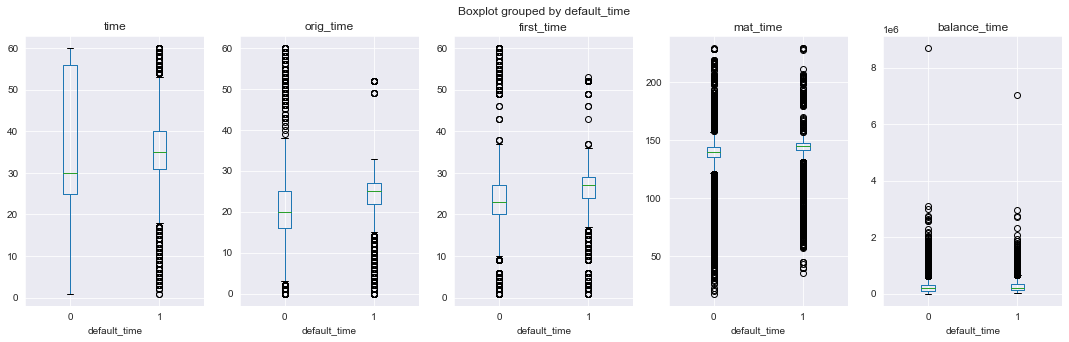

In [40]:
GraphicalAnalysis(df,"default_time",continuous_var[0:5])

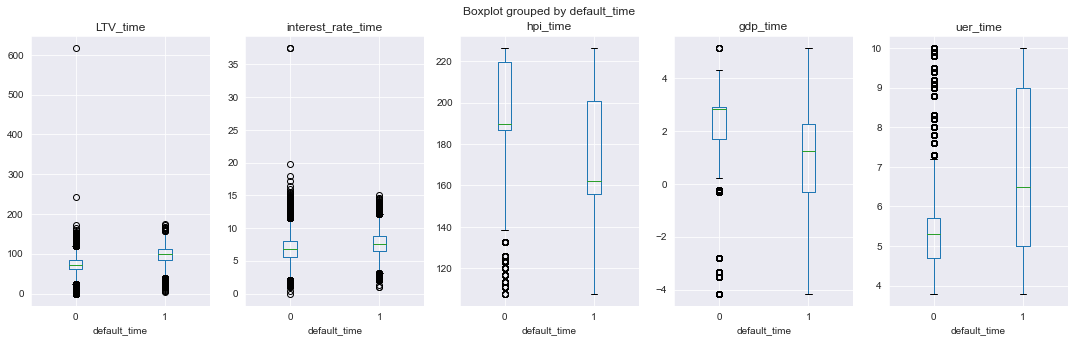

In [41]:
GraphicalAnalysis(df,"default_time",continuous_var[5:10])

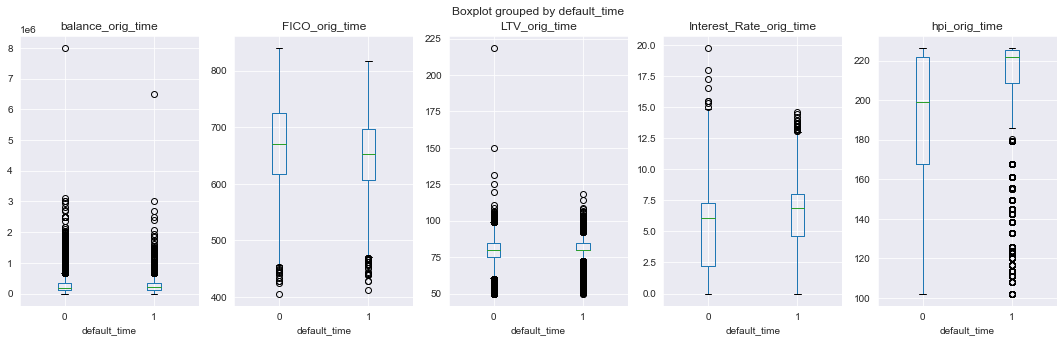

In [42]:
GraphicalAnalysis(df,"default_time",continuous_var[10:15])

In [43]:
#test
len(continuous_var[0:5])+len(continuous_var[5:10])+len(continuous_var[10:15])

15

confirmation statistique : Analyse ANOVA
--

In [44]:
# à integrer dans la fonction "utils.py"
def AnovaFunction(data, Target, Continuous_variable):
  
    """
    -----------------------------------------------------------------------------------------
    Cette fonction est une implementation du test Anova pour étudier la correlation 
    entre l'ensemble des variables explicatives continues et la variable cible categorielle.

    hypothese de test (H0) : la varaible Target est correlé a la variable Continuous_variable
    decision : on accepte(H0) si p-value est superieur a 0.05 (soit 5%).
  -----------------------------------------------------------------------------------------

    Paramètre : 
    ___________

    - data : Jeu d données -> DataFrame 
    - Target : variable cible -> str (chain de caractère)
    - Continuous_variable : ensemble des variable continue -> list()

    Sortie : 
    ______

    - variables : liste des variables explicative continue correlé à la varaible cible categorielle  -> list()
    """

    from scipy.stats import f_oneway

    variables=[]
    
    print('\033[1m'+ '##### ANOVA Results ##### \n'+'\033[0m')
    for predictor in Continuous_variable:
        CategoryGroupLists=data.groupby(Target)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print("{:<25} est correlé à {:<25} | P-Value: {}".format(predictor,Target,AnovaResults[1]))
            variables.append(predictor)
        else:
            print( "\033[1m{:<24} \033[0m n'est pas correlé à {:<19} | P-Value: {}".format(predictor,Target,AnovaResults[1]))
    
    return(variables)

In [45]:
continuous_feature = AnovaFunction(df,"default_time",continuous_var)

##### ANOVA Results ##### 

time                      est correlé à default_time              | P-Value: 2.765131454986217e-07
orig_time                 est correlé à default_time              | P-Value: 0.0
first_time                est correlé à default_time              | P-Value: 4.997355852008485e-152
mat_time                  est correlé à default_time              | P-Value: 0.0
balance_time              est correlé à default_time              | P-Value: 4.341564931388563e-18
LTV_time                  est correlé à default_time              | P-Value: 0.0
interest_rate_time        est correlé à default_time              | P-Value: 6.76513147e-315
hpi_time                  est correlé à default_time              | P-Value: 0.0
gdp_time                  est correlé à default_time              | P-Value: 0.0
uer_time                  est correlé à default_time              | P-Value: 0.0
balance_orig_time         n'est pas correlé à default_time        | P-Value: 0.9988500001104578

In [46]:
# à integrer dans la fonction "utils.py"

def Profil_plot(data,categorical_variable,target):

    """
    -----------------------------------------------------------------------------------------
    Cette fonction propose une visulisation la correlation entre l'ensemble 
    des variables explicatives categorielle et la variable cible categorielle.
    -----------------------------------------------------------------------------------------

    Paramètre : 
    ___________

    - data : Jeu d données -> DataFrame 
    - target : variable cible -> str (chain de caractère)
    - categorical_variable : ensemble des variable continue -> list()

    Sortie : 
    ______

    - graphique  -> Barplot()
    
    """

    fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(categorical_variable), figsize=(25,10))
    for CategoricalCol , i in zip(categorical_variable, range(len(categorical_variable))):
        CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data[target])
        CrossTabResult.plot.bar(color=['C7','C10'], ax=PlotCanvas[i])

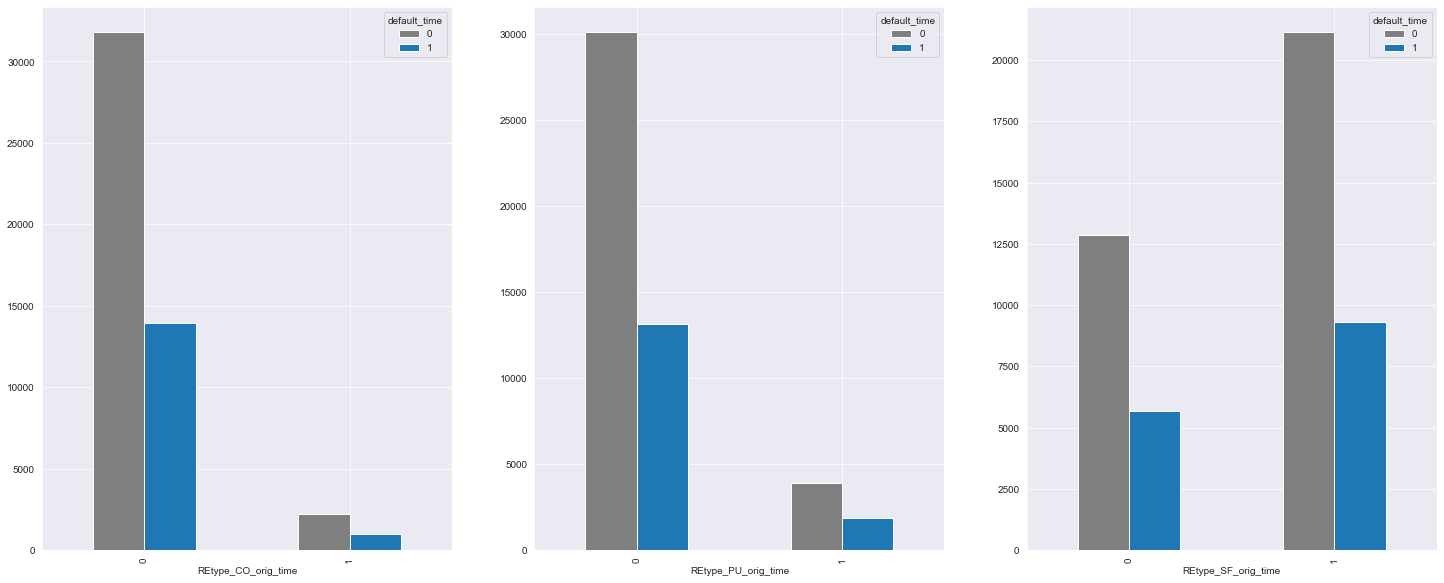

In [47]:
Profil_plot(df,categorical_variable[:3],"default_time")

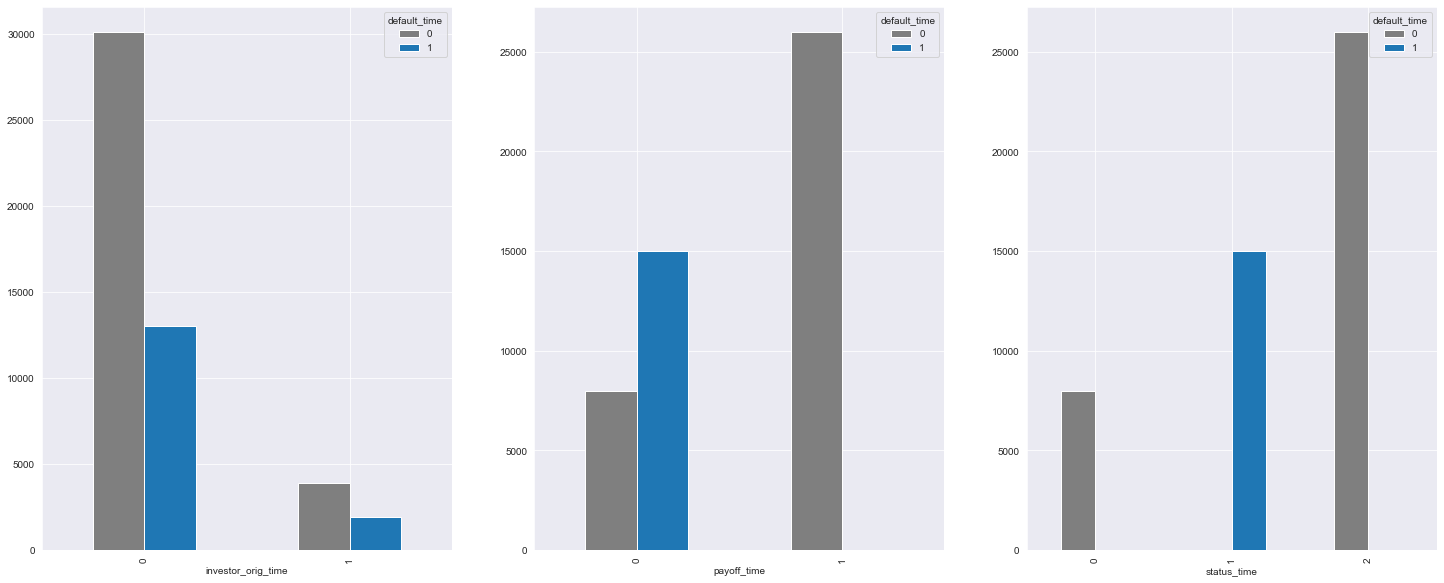

In [48]:
Profil_plot(df,categorical_variable[3:],"default_time")

confirmation statistique : tets de Khi-2
--

In [49]:
# à integrer dans la fonction "utils.py"

def ChisqFunction(data, Target, categorical_var):

    """
    -----------------------------------------------------------------------------------------
    Cette fonction est une implementation du test de Khi-2 pour étudier la correlation 
    entre l'ensemble des variables explicatives categorielle et la variable cible categorielle.

    hypothese de test (H0) : la varaible Target est correlé a la variable categorical_variable
    decision : on accepte(H0) si p-value est superieur a 0.05 (soit 5%).
    -----------------------------------------------------------------------------------------

    Paramètre : 
    ___________

    - data : Jeu d données -> DataFrame 
    - Target : variable cible -> str (chain de caractère)
    - categorical_variable : ensemble des variable categorielle -> list()

    Sortie : 
    ______

    - variables : liste des variables explicative categorielle correlé à la varaible cible categorielle  -> list()
    """

    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in categorical_var:
        CrossTabResult=pd.crosstab(index=data[Target], columns=data[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
    # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'est correlé à', Target, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print("\033[1m"+predictor+"\033[0m", "n'est pas correlé à", Target, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [50]:
categorical_feature = ChisqFunction(df,"default_time",categorical_variable)

REtype_CO_orig_time n'est pas correlé à default_time | P-Value: 0.15978754063648604
REtype_PU_orig_time est correlé à default_time | P-Value: 0.007263144235023219
REtype_SF_orig_time n'est pas correlé à default_time | P-Value: 0.7723188729756557
investor_orig_time est correlé à default_time | P-Value: 1.6230102565142668e-06
payoff_time est correlé à default_time | P-Value: 0.0
status_time est correlé à default_time | P-Value: 0.0


In [51]:
categorical_feature

['REtype_PU_orig_time', 'investor_orig_time', 'payoff_time', 'status_time']

Selection final de variable
--

In [52]:
selected_continuous_feature = list()
selected_categorial_feature = list()
for c in continuous_feature:
    if c in drop:
        pass
    else:
        selected_continuous_feature.append(c)

for j in categorical_feature:
    if j in drop:
        pass
    else:
        selected_categorial_feature.append(j)

predictor = selected_categorial_feature + selected_continuous_feature
len(predictor)

15

construction table final
--

In [53]:
final_df = df[predictor]

In [54]:
final = pd.concat([endog,final_df],axis = 1)

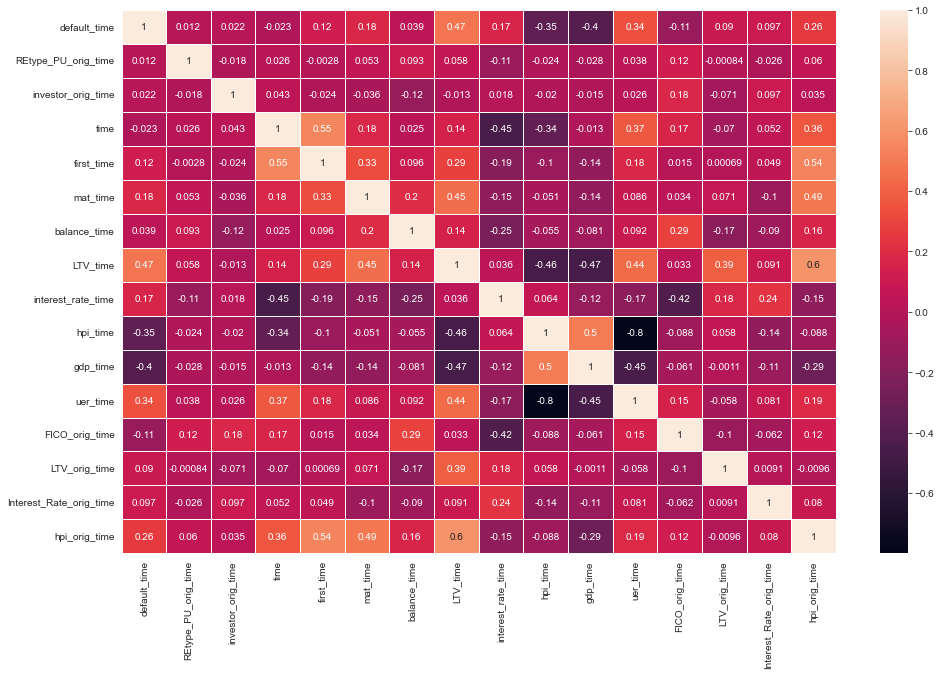

In [55]:
plt.figure(figsize=(16,10))
sns.heatmap(final.corr(method="pearson"),linewidths=0.5,annot=True);

In [56]:
classes = sc.woebin(final, y="default_time", positive=1, method="chimerge")

[INFO] creating woe binning ...
Binning on 48954 rows and 16 columns in 00:00:20


In [57]:
ls = [c for c in classes.keys()]

In [58]:
classes[ls[14]]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,uer_time,"[-inf,5.0)",15104,0.308535,11557,3547,0.234838,-0.362502,0.037498,0.665634,5.0,False
1,uer_time,"[5.0,6.0)",20274,0.414144,16736,3538,0.174509,-0.735313,0.188601,0.665634,6.0,False
2,uer_time,"[6.0,9.0)",6698,0.136822,3254,3444,0.514183,0.875436,0.117388,0.665634,9.0,False
3,uer_time,"[9.0,inf)",6878,0.140499,2425,4453,0.647427,1.426434,0.322147,0.665634,inf,False


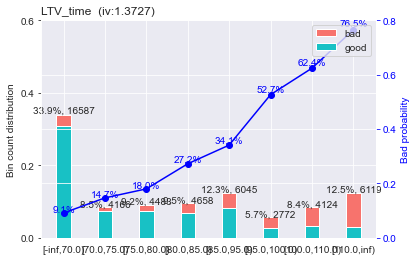

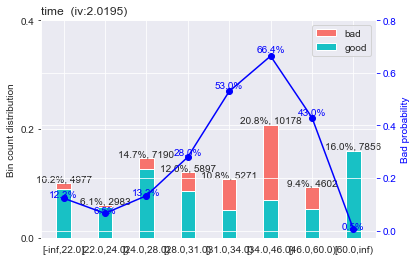

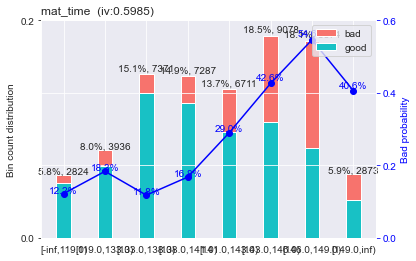

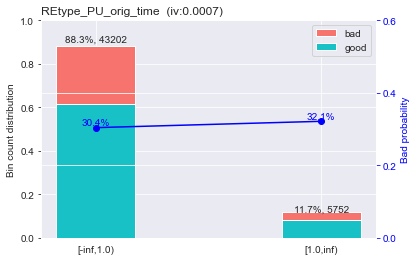

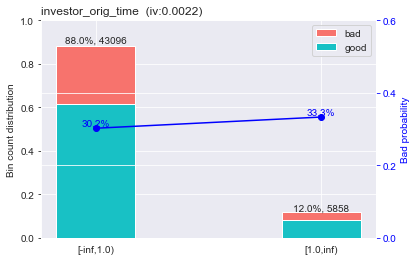

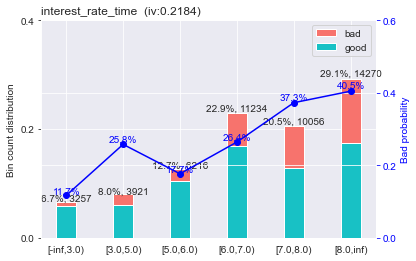

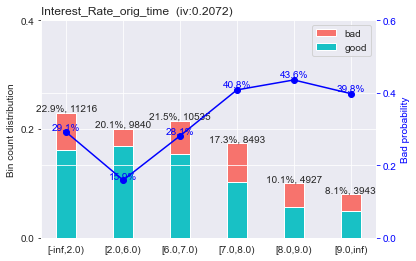

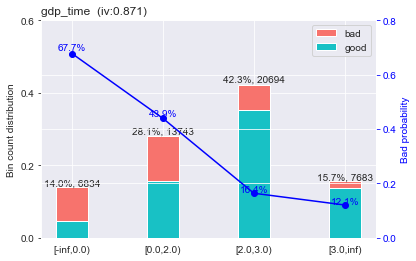

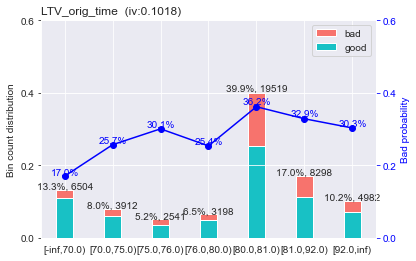

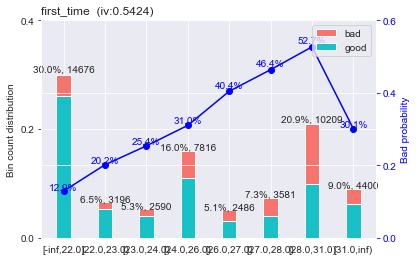

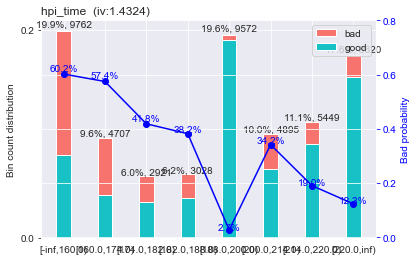

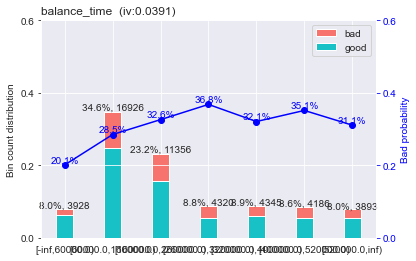

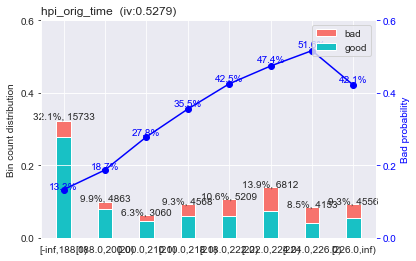

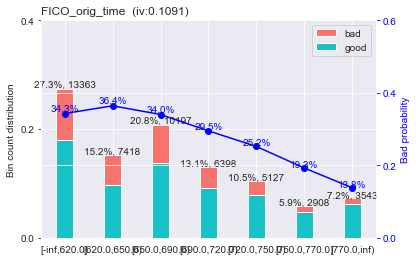

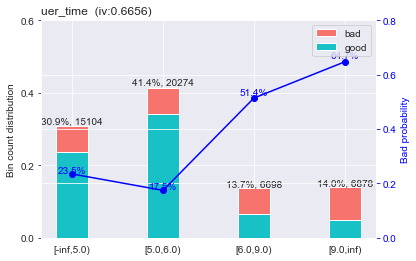

In [59]:
sc.woebin_plot(classes);

In [60]:
train, test = train_test_split(final, test_size = 0.2, random_state = 42)

In [61]:
train_woe = sc.woebin_ply(train, classes)
test_woe = sc.woebin_ply(test, classes)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [62]:
train_woe.head()

,default_time,LTV_time_woe,time_woe,mat_time_woe,REtype_PU_orig_time_woe,hpi_orig_time_woe,investor_orig_time_woe,interest_rate_time_woe,Interest_Rate_orig_time_woe,gdp_time_woe,LTV_orig_time_woe,FICO_orig_time_woe,first_time_woe,hpi_time_woe,uer_time_woe,balance_time_woe
25,0,-1.478736,-1.059952,-0.783359,-0.009679,-1.056824,-0.017453,0.298516,0.446865,-0.810715,0.250467,0.168232,0.01919,-1.144840,-0.362502,-0.101080
99,1,-0.697570,0.535187,-0.783359,-0.009679,-0.650098,-0.017453,-0.205117,-0.118629,0.573709,0.250467,0.156276,0.01919,0.489136,0.875436,0.092733
101,0,-0.697570,-1.059952,-0.783359,-0.009679,-1.056824,-0.017453,0.432457,0.404549,-0.810715,-0.013934,0.168232,0.01919,-1.144840,-0.362502,-0.101080
115,1,0.925571,1.500654,-0.783359,-0.009679,-1.056824,-0.017453,0.432457,0.559482,1.560301,0.250467,0.168232,0.01919,1.232611,1.426434,-0.101080
126,0,-1.478736,-1.059952,-0.783359,-0.009679,-0.650098,-0.017453,-0.720586,-0.845147,-0.810715,0.250467,0.168232,0.01919,-1.144840,-0.362502,0.068720


In [63]:
y_train = train_woe["default_time"]
X_train = train_woe.drop(["default_time"], axis =1)

y_test = test_woe["default_time"]
X_test = test_woe.drop(["default_time"], axis =1)

In [64]:
def selection_np(selector, estimateur, X_train, y_train, X_test, Forward = False, metric = "accuracy", 
                 smote = False, cv = 5):  
 
    """
    Cette fonction affiche pour chaque selector et estimateur, le nombre de variables
    selectionnés, les variables selectionnées.
    Si le selector est la RFE ou ExhaustiveFeatureSelector, la fonction affiche le score obtenu après la sélection.
    
    Paramètres :
    ------
    selector : {"RFE", "SequentialFeatureSelector", "ExhaustiveFeatureSelector"}
            Une méthode de sélection de variables,
                
    estimateur : Tout algorithme de classification type sklearn,
    
    Forward : bool (default: True)
            Forward selection si True,
    
    print_estimateur : bool (default: False)
                    Affiche le nom de l'estimateur utilisé
    
    Note
    ------
    Nous recommandons de ne pas utiliser une technique de Validation croisée avec la selection ExhaustiveFeatureSelector.
    En effet elle l'inclut déjà.
    
    Examples
    ------
    >>>from sklearn.linear_model import LogisticRegression
    >>>from sklearn.feature_selection import RFE
    
    selection(RFE, LogisticRegression(), print_estimateur = True)
    """
    import time
    import re
    
    if smote == True:


        smote = SMOTE(random_state=0 ,k_neighbors=15)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    if selector == RFE:

        a = re.findall(r"\w+", str(selector))
        t1 = time.time()
        nov_list=np.arange(1, X_train.shape[1]+1)            
        high_score=0
        nov=0           
        score_list =[]
        for n in range(len(nov_list)):
            model = estimateur
            b = re.findall(r"[A-Za-z0-9\(\)\_\=\,]+", str(model))
            sel = selector(model,nov_list[n])
            X_train_sel = sel.fit_transform(X_train, y_train)
            X_test_sel = sel.transform(X_test)
            model.fit(X_train_sel,y_train)
            scores = cross_val_score(model, X_train_sel, y_train, scoring = metric, cv = cv)
            score = np.mean(scores)
            score_list.append(score)
            if(score>high_score):
                high_score = score
                nov = nov_list[n]
        t2 = time.time() - t1
        temp = pd.Series(sel.support_,index = X_train.columns)
        variables = temp[temp==True].index

    elif selector == SequentialFeatureSelector:
        t1 = time.time()
        a = re.findall(r"\w+", str(selector))
        model = estimateur
        b = re.findall(r"[A-Za-z0-9\(\)\_\=\,]+", str(model))
        sfs = SequentialFeatureSelector(model, k_features = "best", forward = Forward, scoring = metric, cv = cv )
        sfs.fit(X_train, y_train)
        variables = list(sfs.k_feature_names_)
        t2 = time.time() - t1
        high_score = sfs.k_score_

    elif selector == ExhaustiveFeatureSelector:
        a = re.findall(r"\w+", str(selector))
        t1 = time.time()
        model = estimateur
        b = re.findall(r"[A-Za-z0-9\(\)\_\=\,]+", str(model))
        efs = ExhaustiveFeatureSelector(model, scoring = metric, min_features = 7, max_features = 11, cv = cv)
        efs.fit(X_train, y_train)
        variables = X_train.columns[list(efs.best_idx_)]
        high_score = efs.best_score_
        t2 = time.time() - t1

    all_scores_dict = {"Selector" : a[-1], "Estimateur" : b[0], "Score" : high_score, "N_Variables": len(variables),"Variables" :list(variables), "Duree(s)" : t2 }    

    return all_scores_dict

In [65]:
try:
    all_scores_dict = selection_np(RFE, LogisticRegression(), X_train, y_train, X_test, Forward = False, metric='roc_auc')
except Exception as e:
    print(e.args[0])

__init__() takes 2 positional arguments but 3 were given


In [66]:
def selection_list(selectors, algos, X_train, y_train, X_test, Forward = False, metric = "accuracy", 
                  smote = False, cv = 5):
    """
    docstring à faire
    """
    dictionnaire = {"Selector" : [], "Estimateur" : [], "Score" : [], "N_Variables": [], "Duree(s)" : [], "Variables" : []}

    for algo in algos:
        for selector in selectors :
            all_scores_dict = selection_np(selector, algo, X_train, y_train, X_test,  Forward = True, metric=metric, smote = smote)
            dictionnaire["Selector"].append(all_scores_dict["Selector"])
            dictionnaire["Estimateur"].append(all_scores_dict["Estimateur"])
            dictionnaire["Score"].append(all_scores_dict["Score"])
            dictionnaire["N_Variables"].append(all_scores_dict["N_Variables"])
            dictionnaire["Variables"].append(all_scores_dict["Variables"])
            dictionnaire["Duree(s)"].append(all_scores_dict["Duree(s)"])
            
    recap  = pd.DataFrame(dictionnaire)
    recap.sort_values(by=["Score"], inplace=True, ascending=False)
    
    return recap

In [ ]:
selectors = [SequentialFeatureSelector, ExhaustiveFeatureSelector]
algos = [LogisticRegression()]
recaps = selection_list(selectors, algos, X_train, y_train, X_test, metric = "roc_auc", smote = True)
recaps

Constructuction des classe homogene de risque
--

In [ ]:
def val(X, y, smote = False):
    
    if smote == True : 
        title = 'Logit Regression with smote results'
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=0 ,k_neighbors=15)
        X_s, y_s = smote.fit_resample(X, y)
        X_sc = tools.add_constant(X_s, prepend=True, has_constant='skip')
        log_reg = sm.Logit(y_s, X_sc).fit().summary(title = title)
    else : 
        X_c = tools.add_constant(X, prepend=True, has_constant='skip')
        log_reg = sm.Logit(y, X_c).fit().summary2()

    print(log_reg)
    return 


implemantation modele logistique
==

In [ ]:
# à integrer dans la fonction "utils.py"

class LogisticRegressor(object):


  def __init__(self,X,y):

    self.X = X
    self.y = y

  # initilisation des paramettre
  def initialisation(self,):
    W = np.random.randn(self.X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

  # construction du model
  def model(self,):
    Z = self.X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

  # impementation de la fontion de coût
  def log_loss(self,):
    return 1 / len(self.y) * np.sum(-self.y * np.log(A) - (1 - self.y) * np.log(1 - A))

  # optimisateur de 
  def gradients(self,):
    dW = 1 / len(self.y) * np.dot(self.X.T, A - self.y)
    db = 1 / len(self.y) * np.sum(A - self.y)
    return (dW, db)

  def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

  def predict(self,):
    A = model(self.X, W, b)
    # print(A)
    return A >= 0.5

  # perceptron Natif a 

  def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)


In [ ]:
#Encodage pour les classe homogene.

a2z = 'ABCDEFGHIJKLMNOPQRSTUVWxYZ'
a2z_code = np.arange(1,27)
a2z_mapping = dict(zip(a2z, a2z_code))

In [ ]:
import numpy as np

In [ ]:
np.around(((3*950*0.04)/((3*715.8)*(1+0.09/3)**(3*3))),4)

In [ ]:
np.around(((3*1000)/(950*(1+0.09/3)**(3*3))),4)

In [ ]:
a= 0.0125 + 0.024 + 0.0346 + 0.0444 + 1.774
a

In [ ]:
a/(1+0.08/2)

In [ ]:
0.087 * 12

In [ ]:
0.157 * 12 